# Redo - Capstone Project

Machine Learning Engineer - Udacity 

Titanic Kaggle Competition: https://www.kaggle.com/c/titanic/overview/description



### Import Python Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import boto3
import sagemaker

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter


### Get Training and Testing Data

In [48]:
train_data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# FEATURES of Data. Don't need the PassengerID, Name, and Ticket. I assume Name and Ticket are related to Cabin for social class.
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Survived']
train = train_data[features]
# label = train_data['Survived']

In [51]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


In [52]:
train.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [53]:
train.mean()

Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [54]:
#label.head()

In [55]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.563487
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.855686
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [56]:
features_test = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
test = test[features_test]
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [57]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.563487
std,0.841838,14.181209,0.896760,0.981429,55.855686
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


### Data Processing and Visualization

#### Box and Whisker Plots

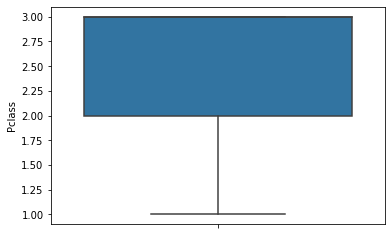

In [58]:
# Pclass Box and Wisker Plot
sns.boxplot(y=train['Pclass'])

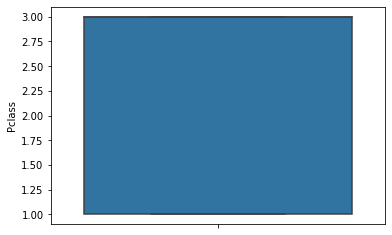

In [59]:
# Pclass Box and Wisker Plot
sns.boxplot(y=test['Pclass'])

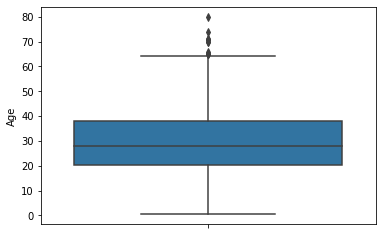

In [60]:
# Age Box and Wisker Plot
sns.boxplot(y=train['Age'])

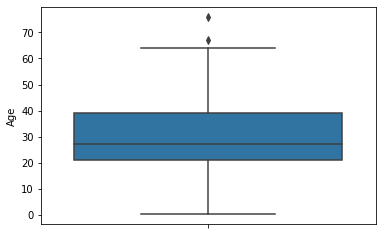

In [61]:
# Age Box and Wisker Plot
sns.boxplot(y=test['Age'])

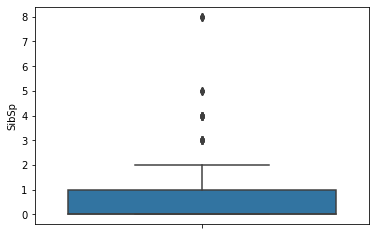

In [62]:
# SibSp Box and Wisker Plot
sns.boxplot(y=train['SibSp'])

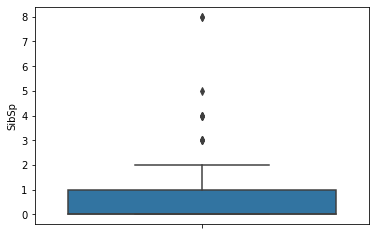

In [63]:
# SibSp Box and Wisker Plot
sns.boxplot(y=test['SibSp'])

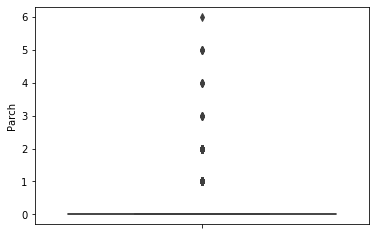

In [64]:
# Parch Box and Wisker Plot
sns.boxplot(y=train['Parch'])

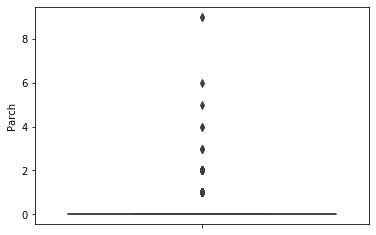

In [65]:
# Parch Box and Wisker Plot
sns.boxplot(y=test['Parch'])

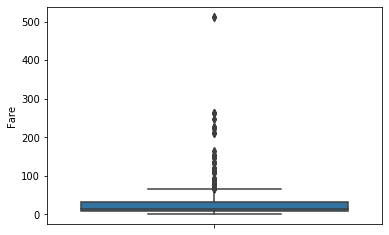

In [66]:
# Fare Box and Wisker Plot
sns.boxplot(y=train['Fare'])

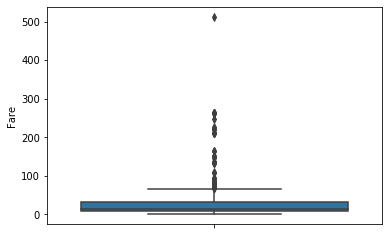

In [67]:
# Fare Box and Wisker Plot
sns.boxplot(y=test['Fare'])

#### Get Rid of Missing or Null Data

In [68]:
# Missing training data
train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Survived      0
dtype: int64

In [69]:
train.shape

(891, 9)

In [70]:
# Missing testing data
test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [71]:
test.shape

(418, 8)

##### Cabin Missing Values

In [72]:
print(train['Cabin'])

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object


In [73]:
# Training data types
train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [74]:
# Fill in missing cabin values with N. And get only i[0] or the first letter of cabin
train_cabin = [i[0] if not pd.isnull(i) else 'N' for i in train['Cabin']]
train["Cabin"] = pd.Series(train_cabin)
train["Cabin"].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [75]:
train["Cabin"]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [76]:
# Fill in missing cabin values with N. And get only i[0] or the first letter of cabin
test_cabin = [i[0] if not pd.isnull(i) else 'N' for i in test['Cabin']]
test["Cabin"] = pd.Series(test_cabin)
test["Cabin"].head()

0    N
1    N
2    N
3    N
4    N
Name: Cabin, dtype: object

In [77]:
test["Cabin"]

0      N
1      N
2      N
3      N
4      N
      ..
413    N
414    C
415    N
416    N
417    N
Name: Cabin, Length: 418, dtype: object

##### Age missing values

In [78]:
# Missing training data
train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
Survived      0
dtype: int64

In [79]:
# Missing training data
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Cabin        0
Embarked     0
dtype: int64

I choose to just put in the passengers median age for the missing age data. To keep this simple. 



In [80]:
# train = train.dropna(how='any', axis=0)
age_index = list(train["Age"][train["Age"].isnull()].index)

for i in age_index:
    train["Age"].iloc[i] = train["Age"].median()
    

In [81]:
train.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208,0.383838
std,0.836071,13.019697,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [82]:
# Missing training data
train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Survived    0
dtype: int64

In [83]:
#test = test.dropna(how='any', axis=0)
age_index = list(test["Age"][test["Age"].isnull()].index)

for i in age_index:
    test["Age"].iloc[i] = test["Age"].median()
    

In [84]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.563487
std,0.841838,12.703770,0.896760,0.981429,55.855686
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [85]:
# Missing testing data
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### Convert to Integers

To compare features easier for feature selection and to normalize the data, I am converting the training and testing data to int.

In [86]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,N,S,0
1,1,female,38.0,1,0,71.2833,C,C,1
2,3,female,26.0,0,0,7.9250,N,S,1
3,1,female,35.0,1,0,53.1000,C,S,1
4,3,male,35.0,0,0,8.0500,N,S,0


##### Sex

Convert male = 0 and female = 1

In [88]:
train["Sex"] = train["Sex"].map({"male": 0, "female":1})

In [89]:
test["Sex"] = test["Sex"].map({"male": 0, "female":1})

##### Cabin

Convert a = 0, b = 1, c = 2, d = 3, e = 4, f = 5, g = 6, t = 7, n = 8

In [90]:
train["Cabin"] = train["Cabin"].map({"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "T":7, "N":8})

In [91]:
test["Cabin"] = test["Cabin"].map({"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "T":7, "N":8})

##### Embarked

Convert s = 0, c = 1, q = 2

In [92]:
train["Embarked"] = train["Embarked"].map({"S":0, "C":1, "Q":2})

In [93]:
test["Embarked"] = test["Embarked"].map({"S":0, "C":1, "Q":2})

In [94]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,0,22.0,1,0,7.2500,8,0,0
1,1,1,38.0,1,0,71.2833,2,1,1
2,3,1,26.0,0,0,7.9250,8,0,1
3,1,1,35.0,1,0,53.1000,2,0,1
4,3,0,35.0,0,0,8.0500,8,0,0


In [95]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,8,2
1,3,1,47.0,1,0,7.0000,8,0
2,2,0,62.0,0,0,9.6875,8,2
3,3,0,27.0,0,0,8.6625,8,0
4,3,1,22.0,1,1,12.2875,8,0


#### Integers Training and Testing Data

Preprocessed data

In [96]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,0,22.0,1,0,7.2500,8,0,0
1,1,1,38.0,1,0,71.2833,2,1,1
2,3,1,26.0,0,0,7.9250,8,0,1
3,1,1,35.0,1,0,53.1000,2,0,1
4,3,0,35.0,0,0,8.0500,8,0,0


In [97]:
train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,6.716049,0.361392,0.383838
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,2.460739,0.635673,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,8.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,8.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,8.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,8.000000,2.000000,1.000000


In [98]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,8,2
1,3,1,47.0,1,0,7.0000,8,0
2,2,0,62.0,0,0,9.6875,8,2
3,3,0,27.0,0,0,8.6625,8,0
4,3,1,22.0,1,1,12.2875,8,0


In [99]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.599282,0.447368,0.392344,35.563487,6.758373,0.464115
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.855686,2.443901,0.685516
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,8.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,8.000000,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,8.000000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,8.000000,2.000000


### Feature Selection & Further Visualization

#### Correlation Matrix

In [1464]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,0,22.0,1,0,7.2500,8,0,0
1,1,1,38.0,1,0,71.2833,2,1,1
2,3,1,26.0,0,0,7.9250,8,0,1
3,1,1,35.0,1,0,53.1000,2,0,1
4,3,0,35.0,0,0,8.0500,8,0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,8,0,0
887,1,1,19.0,0,0,30.0000,1,0,1
888,3,1,28.0,1,2,23.4500,8,0,0
889,1,0,26.0,0,0,30.0000,2,1,1


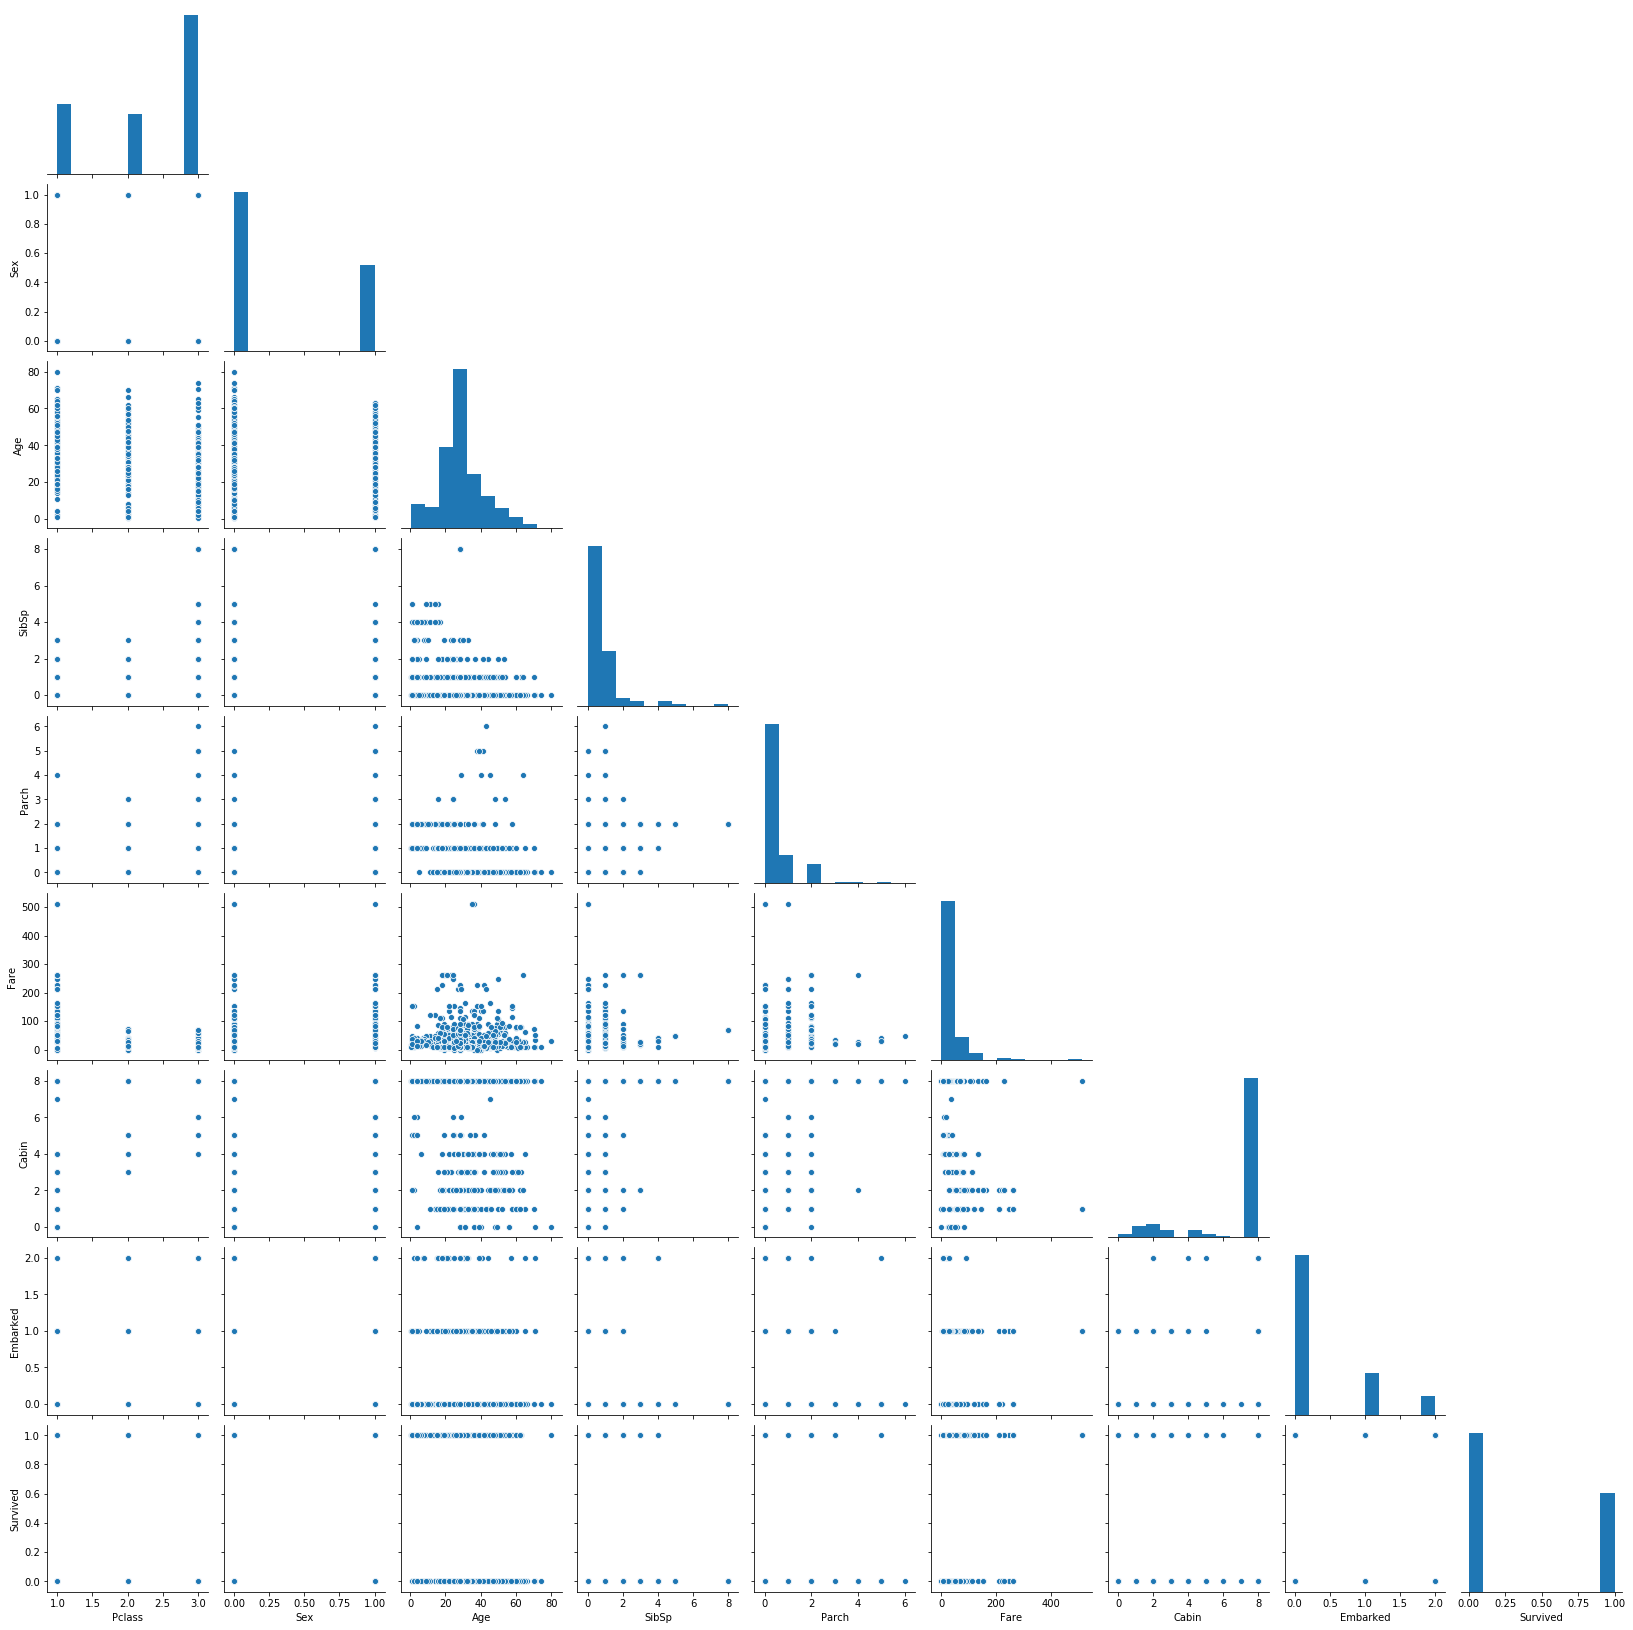

In [1465]:
# TRAINING DATA
# Plot Pairwise Relationship in Training Data - https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(train, corner=True)
plt.show()

Text(0.5, 1, 'Correlation Matrix')

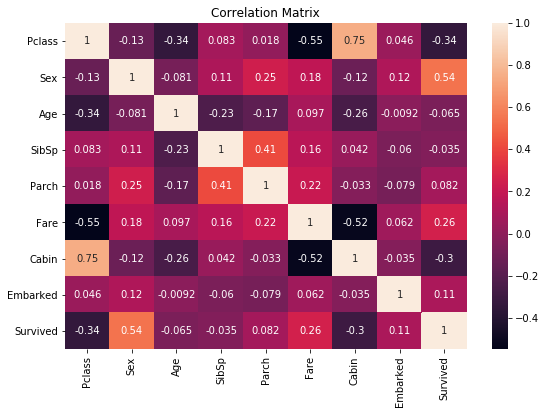

In [1466]:
# TRAINING DATA
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
g = plt.subplots(figsize=(9,6))
g = sns.heatmap(train.corr(), annot=True)
g.set_title('Correlation Matrix')


#### Define Labels for Training Data

In [1467]:
label = train['Survived']

#### Visualize Features and Survived Labels in Training Data

Text(0.5, 1.0, 'Passenger Survived Count')

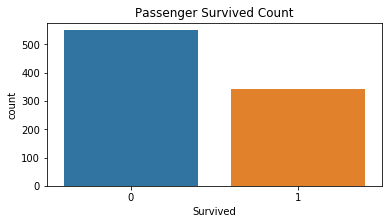

In [1468]:
############################
# Survived Label
############################
fig, g = plt.subplots()
sns.countplot(label, ax=g).set_title('Passenger Survived Count')

In [1469]:
############################
# Pclass Feature vs Survived Label
############################
train[["Pclass","Survived"]].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Pclass Likelihood of Survival')

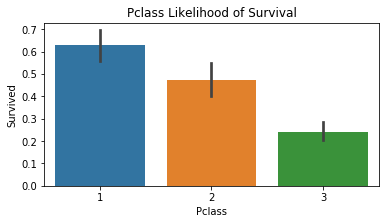

In [1470]:
plt.subplots()
sns.barplot(x = "Pclass", y = "Survived", data = train).set_title('Pclass Likelihood of Survival')

Text(0.5, 1.0, 'Pclass Count')

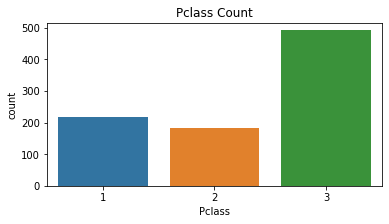

In [1471]:
# Count
fig, g = plt.subplots()
sns.countplot(train["Pclass"], ax=g).set_title('Pclass Count')

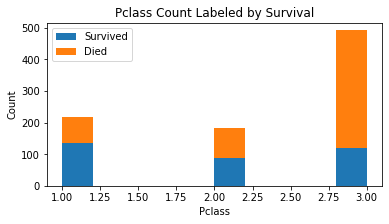

In [1472]:
plt.subplots()
plt.hist(x = [train[train["Survived"]==1]["Pclass"] , train[train["Survived"]==0]["Pclass"]], 
         stacked = True, label=["Survived", "Died"])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass Count Labeled by Survival')
plt.legend()

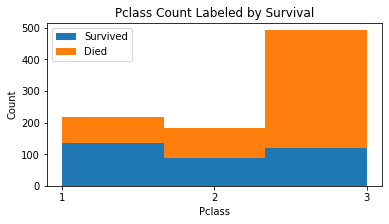

In [1473]:
plt.subplots()
bins = [1,2,3]
plt.hist(x = [train[train["Survived"]==1]["Pclass"] , train[train["Survived"]==0]["Pclass"]], 
         bins = 3, stacked = True, label=["Survived", "Died"])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass Count Labeled by Survival')
plt.legend()

plt.xticks(bins)
plt.rcParams["figure.figsize"] = (6,3)

In [1474]:
############################
# Sex Feature vs Survived Label
############################
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
0,0.188908
1,0.742038


Text(0.5, 1.0, 'Sex Likelihood of Survival')

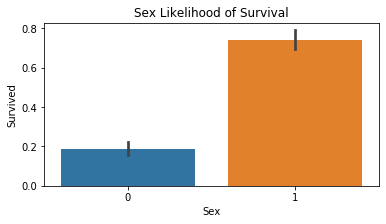

In [1475]:
plt.subplots()
sns.barplot(x = "Sex", y = "Survived", data = train).set_title('Sex Likelihood of Survival')

Text(0.5, 1.0, 'Sex Count')

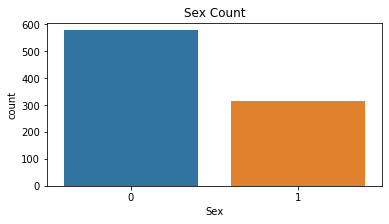

In [1476]:
# Count
fig, g = plt.subplots()
sns.countplot(train["Sex"], ax=g).set_title('Sex Count')

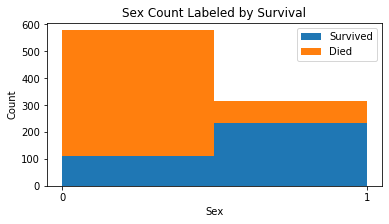

In [1477]:
plt.subplots()
bins = [0,1]
plt.hist(x = [train[train["Survived"]==1]["Sex"] , train[train["Survived"]==0]["Sex"]], 
         bins = 2, stacked = True, label=["Survived", "Died"])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count Labeled by Survival')
plt.legend()

plt.xticks(bins)
plt.rcParams["figure.figsize"] = (6,3)

In [1478]:
############################
# Age Feature vs Survived Label
############################
train[["Age","Survived"]].groupby('Age').mean()


,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


Text(0.5, 1.0, 'Age Count')

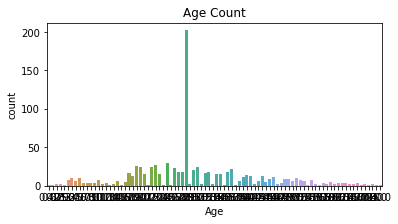

In [1479]:
# Count
fig, g = plt.subplots()
sns.countplot(train["Age"], ax=g).set_title('Age Count')


Text(0.5, 1.0, 'Age vs Count')

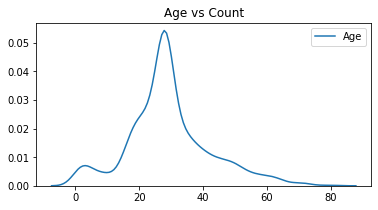

In [1480]:
fig, g = plt.subplots()
sns.kdeplot(train["Age"], ax=g).set_title('Age vs Count')

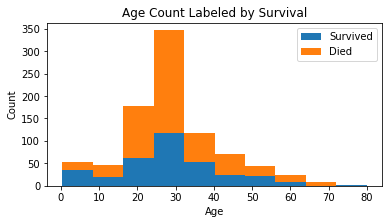

In [1481]:
plt.subplots()
plt.hist(x = [train[train["Survived"]==1]["Age"] , train[train["Survived"]==0]["Age"]], 
         stacked = True, label=["Survived", "Died"])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Count Labeled by Survival')
plt.legend()


In [1482]:
############################
# SibSp Feature vs Survived Label
############################
train[["SibSp","Survived"]].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Text(0.5, 1.0, 'SibSp Likelihood of Survival')

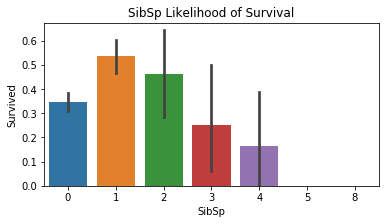

In [1483]:
plt.subplots()
sns.barplot(x = "SibSp", y = "Survived", data = train).set_title('SibSp Likelihood of Survival')

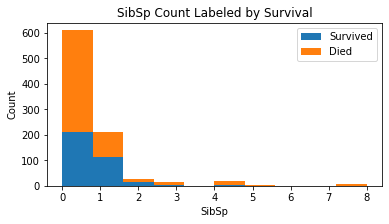

In [1484]:
plt.subplots()
plt.hist(x = [train[train["Survived"]==1]["SibSp"] , train[train["Survived"]==0]["SibSp"]], 
         stacked = True, label=["Survived", "Died"])
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('SibSp Count Labeled by Survival')
plt.legend()

In [1485]:
############################
# Parch Feature vs Survived Label
############################
train[["Parch","Survived"]].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Text(0.5, 1.0, 'Parch Likelihood of Survival')

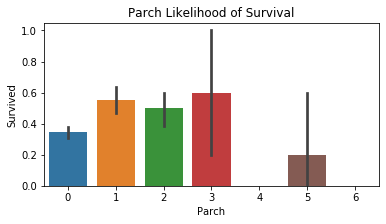

In [1486]:
plt.subplots()
sns.barplot(x = "Parch", y = "Survived", data = train).set_title('Parch Likelihood of Survival')

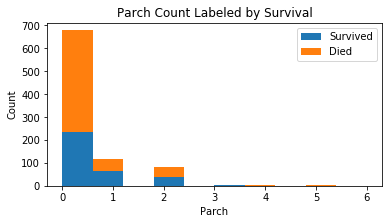

In [1487]:
plt.subplots()
plt.hist(x = [train[train["Survived"]==1]["Parch"] , train[train["Survived"]==0]["Parch"]], 
         stacked = True, label=["Survived", "Died"])
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Parch Count Labeled by Survival')
plt.legend()

In [1488]:
############################
# Fare Feature vs Survived Label
############################
train[["Fare","Survived"]].groupby('Fare').mean()

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


Text(0.5, 1.0, 'Fare Likelihood of Survival')

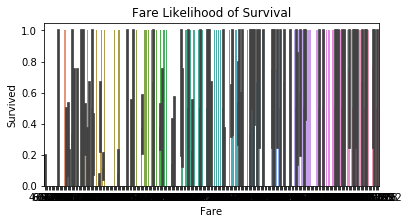

In [1489]:
plt.subplots()
sns.barplot(x = "Fare", y = "Survived", data = train).set_title('Fare Likelihood of Survival')

Text(0.5, 1.0, 'Fare vs Count')

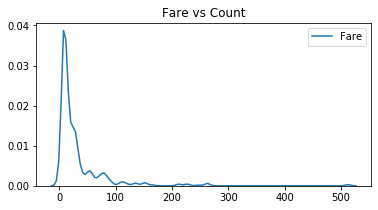

In [1490]:
fig, g = plt.subplots()
sns.kdeplot(train["Fare"], ax=g).set_title('Fare vs Count')

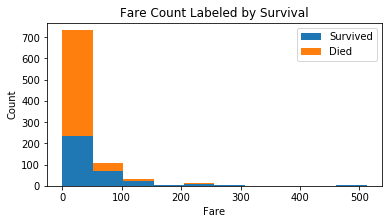

In [1491]:
plt.subplots()
plt.hist(x = [train[train["Survived"]==1]["Fare"] , train[train["Survived"]==0]["Fare"]], 
         stacked = True, label=["Survived", "Died"])
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Count Labeled by Survival')
plt.legend()
plt.rcParams["figure.figsize"] = (8,6)

In [1492]:
############################
# Cabin Feature vs Survived Label
############################
train[["Cabin","Survived"]].groupby('Cabin').mean()

,Survived
Cabin,
0,0.466667
1,0.744681
2,0.593220
3,0.757576
4,0.750000
5,0.615385
6,0.500000
7,0.000000
8,0.299854


Text(0.5, 1.0, 'Cabin Likelihood of Survival')

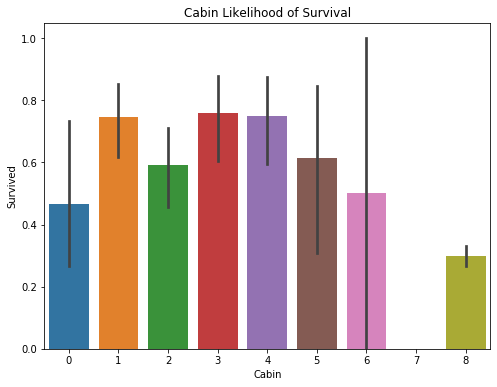

In [1493]:
plt.subplots()
sns.barplot(x = "Cabin", y = "Survived", data = train).set_title('Cabin Likelihood of Survival')

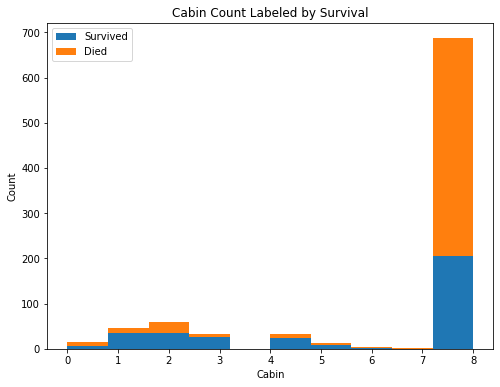

In [1494]:
plt.subplots()
plt.hist(x = [train[train["Survived"]==1]["Cabin"] , train[train["Survived"]==0]["Cabin"]], 
         stacked = True, label=["Survived", "Died"])
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.title('Cabin Count Labeled by Survival')
plt.legend()


In [1495]:
############################
# Embarked Feature vs Survived Label
############################
train[["Embarked","Survived"]].groupby('Embarked').mean()

,Survived
Embarked,
0,0.339009
1,0.553571
2,0.389610


Text(0.5, 1.0, 'Embarked Likelihood of Survival')

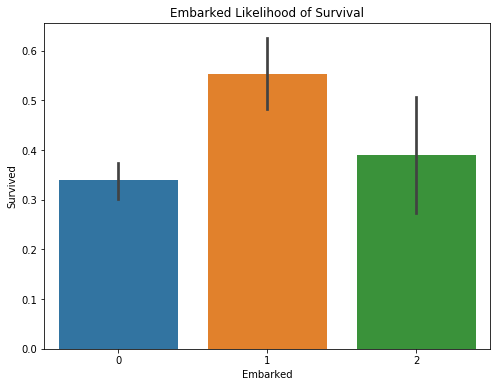

In [1496]:
plt.subplots()
sns.barplot(x = "Embarked", y = "Survived", data = train).set_title('Embarked Likelihood of Survival')

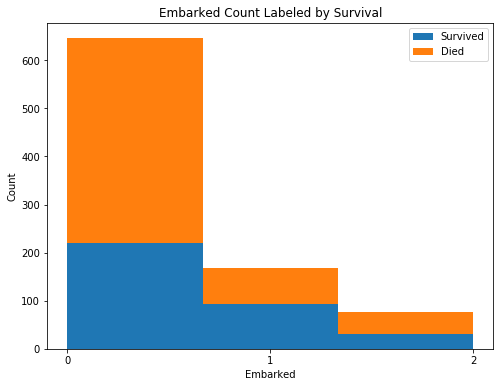

In [1497]:
plt.subplots()
bins = [0,1,2]
plt.hist(x = [train[train["Survived"]==1]["Embarked"] , train[train["Survived"]==0]["Embarked"]], 
         bins = 3, stacked = True, label=["Survived", "Died"])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked Count Labeled by Survival')
plt.legend()

plt.xticks(bins)
plt.rcParams["figure.figsize"] = (6,3)

In [1498]:
train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,6.716049,0.361392,0.383838
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,2.460739,0.635673,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,8.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,8.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,8.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,8.000000,2.000000,1.000000


#### Drop Survived Label in Training Data

In [1499]:
train.drop(['Survived'], axis = 1, inplace = True)

In [1500]:
#features.describe()

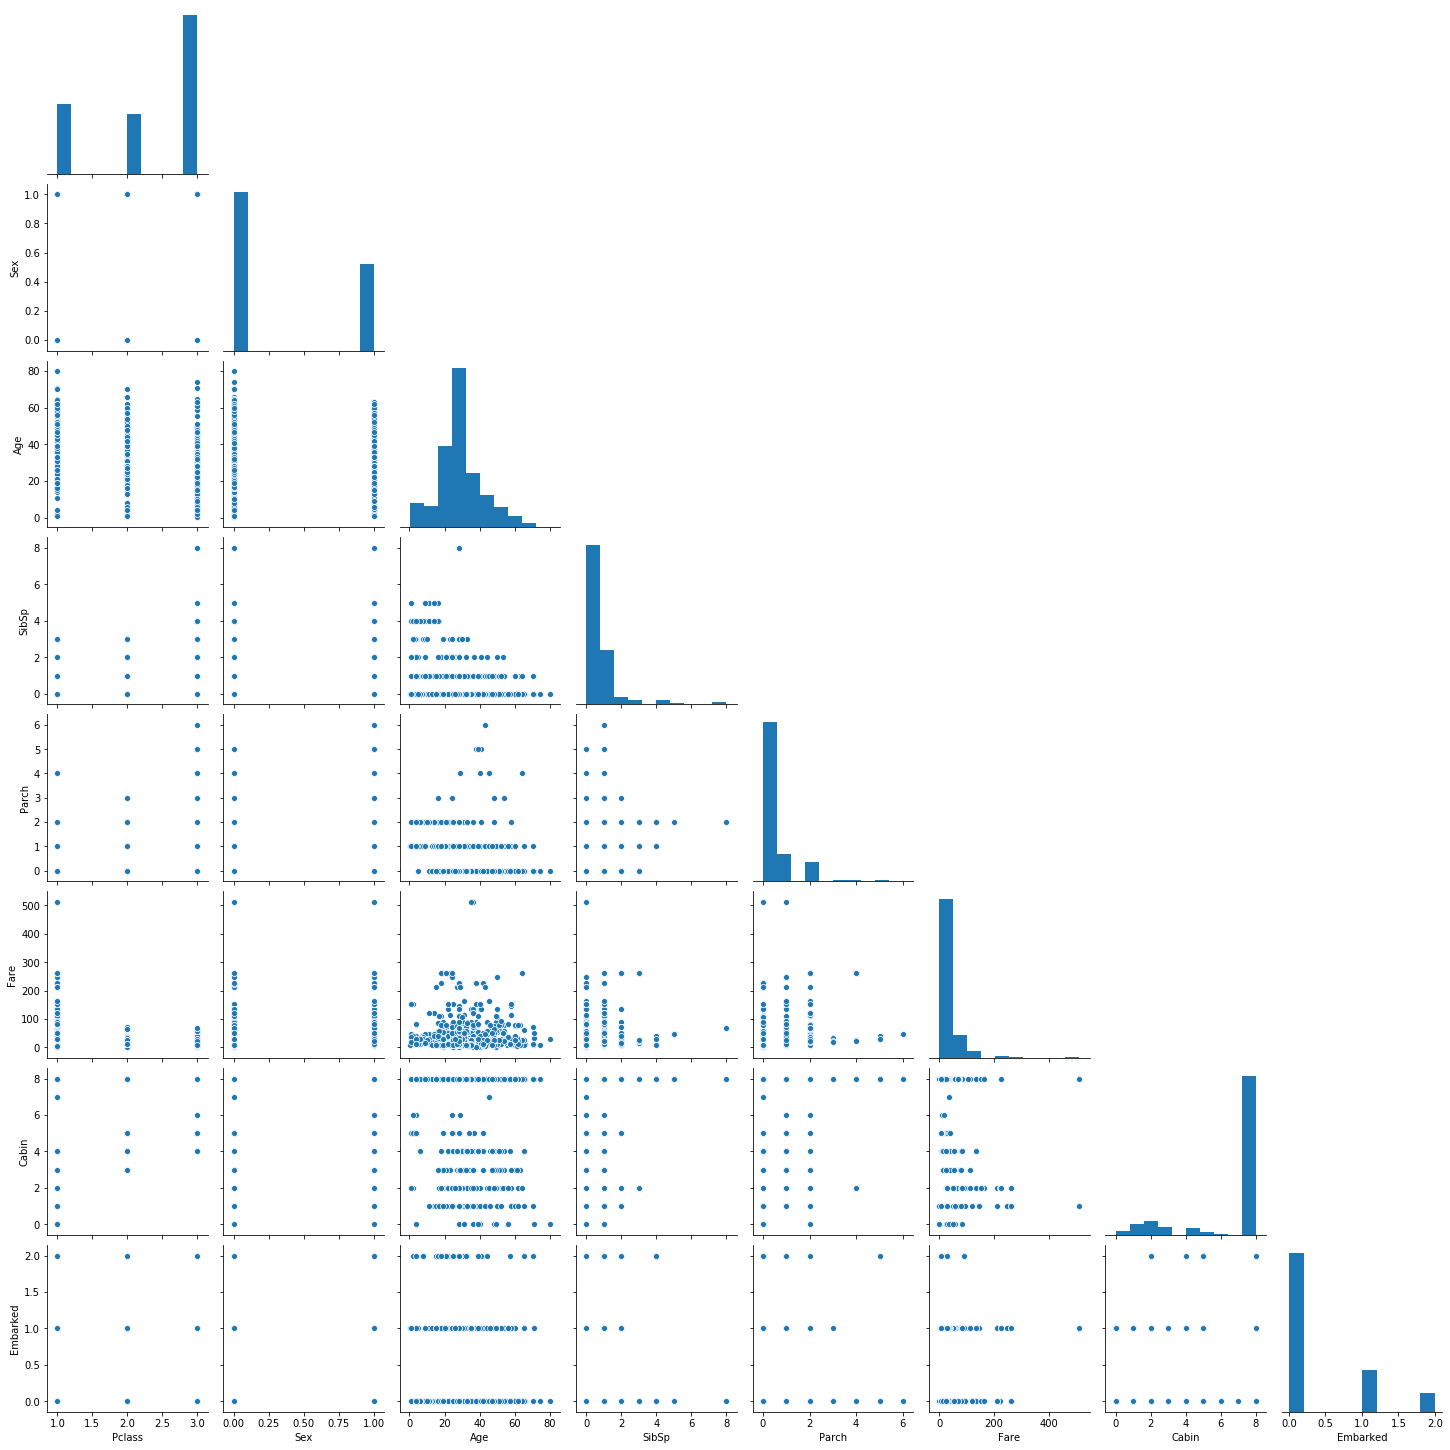

In [1501]:
# TRAINING DATA
# Plot Pairwise Relationship in Training Data - https://seaborn.pydata.org/generated/seaborn.pairplot.html
#sns.set()
sns.pairplot(train, corner=True)
plt.show()

Text(0.5, 1, 'Correlation Matrix')

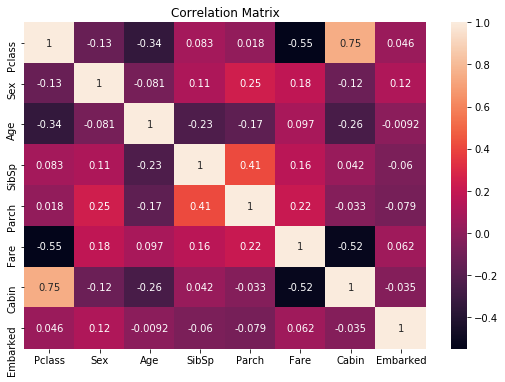

In [1502]:
# TRAINING DATA
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
g = plt.subplots(figsize=(9,6))
g = sns.heatmap(train.corr(), annot=True)
g.set_title('Correlation Matrix')


#### Select Features for Training based on Feature Importance with Extra Trees Classifier

https://machinelearningmastery.com/feature-selection-machine-learning-python/

Let's try skipping this step first. Since I already dropped other features in the beginning (e.g. Name, Ticket, PassengerId). If the results are bad, I should come back and do further feature selection and drop irrelevant features.

From the ExtraTreeClassifer, it seems like the Age and Cabin features are most importance.

In [1503]:
###################################
# Feature Selection Through ExtraTreesCkassufer
###################################
from sklearn.ensemble import ExtraTreesClassifier

In [1504]:
array = train.values
X = array[:,0:7]
Y = array[:,7]

In [1505]:
# feature extrations
model = ExtraTreesClassifier(n_estimators = 10)
model.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [1506]:
print(model.feature_importances_)

[0.05618038 0.02220112 0.23949922 0.04987457 0.04551744 0.52657955
 0.0601477 ]


#### Drop Irrelevant Features

In [1507]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.0,1,0,7.2500,8,0
1,1,1,38.0,1,0,71.2833,2,1
2,3,1,26.0,0,0,7.9250,8,0
3,1,1,35.0,1,0,53.1000,2,0
4,3,0,35.0,0,0,8.0500,8,0


#### Normalized the dataset and eliminate any outliers

Outliers should be eliminated in the dataset as part of data pre-processing. In this case, I don't notice any significant outliers.

In this part, I will condition or standardize the training and testing data using scikit-learn, StandardScaler class.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [1508]:
# normalized training and testing data
scaler = StandardScaler().fit(train)

In [1509]:
scaled_train = scaler.transform(train)

In [1510]:
scaled_test = scaler.transform(test)

### Train Test Split

Train test split the data. We will have a cross-validation data set to be use to tune the parameters of the model. We can use scikit-lear to train_test_split the data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

I chose to have a cross validation size of 10 percent. This cross validation will help us optimize the model.

In [1511]:
x_train, x_cv, y_train, y_cv = train_test_split(scaled_train, label, test_size=0.10, random_state=77)

In [1512]:
len(x_train)

801

In [1513]:
len(y_train)

801

### Initial Benchmark Models


These are the four Machine Learning Models I plan to use:
1. Support Vector
2. Decision Tree
3. Random Forest
4. K-Nearest Neighbors

In [1514]:
def get_scores(predictor):
    print(predictor, ":")
    print()
    print("training: ", predictor.score(x_train, y_train))
    print("validation: ", accuracy_score(predictor.predict(x_cv), y_cv))

    print()
    print("classification report:")
    print(classification_report(predictor.predict(x_cv), y_cv))

In [1515]:
##################################
# Support Vector classifier
##################################
predictor = Pipeline([('scaller', MinMaxScaler()), ('clf', SVC())])
predictor.fit(x_train,y_train)
get_scores(predictor)
svc_initial_score = accuracy_score(predictor.predict(x_cv), y_cv)


Pipeline(memory=None,
         steps=[('scaller', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False) :

training:  0.8052434456928839
validation:  0.8777777777777778

classification report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        69
           1       0.69      0.86      0.77        21

    accuracy                           0.88        90
   macro avg       0.82      0.87      0.84        90
weighted avg       0.89      0.88      0.88        90



In [1516]:
data =  confusion_matrix(predictor.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,61,8
Actual 1,3,18


In [1517]:
##################################
# Decision Tree classifier
##################################

predictor = Pipeline([('scaller', MinMaxScaler()), ('clf', DecisionTreeClassifier())])
predictor.fit(x_train,y_train)
get_scores(predictor)
dtc_initial_score = accuracy_score(predictor.predict(x_cv), y_cv)

Pipeline(memory=None,
         steps=[('scaller', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False) :

training:  0.9875156054931336
validation:  0.8

classification report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        54
           1       

In [1518]:
data =  confusion_matrix(predictor.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,50,4
Actual 1,14,22


In [1519]:
##################################
# Random Forest classifier
##################################

predictor = Pipeline([('scaller', MinMaxScaler()), ('clf', RandomForestClassifier())])
predictor.fit(x_train,y_train)
get_scores(predictor)
rfc_initial_score = accuracy_score(predictor.predict(x_cv), y_cv)

Pipeline(memory=None,
         steps=[('scaller', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False) :

training:  0.9875156054931336
validation:  0.

In [1520]:
data =  confusion_matrix(predictor.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,52,6
Actual 1,12,20


In [1521]:
##################################
# K-Nearest Neighbors classifier
##################################

predictor = Pipeline([('scaller', MinMaxScaler()), ('clf', KNeighborsClassifier())])
predictor.fit(x_train,y_train)
get_scores(predictor)
knc_initial_score = accuracy_score(predictor.predict(x_cv), y_cv)

Pipeline(memory=None,
         steps=[('scaller', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False) :

training:  0.8539325842696629
validation:  0.8

classification report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        62
           1       0.69      0.64      0.67        28

    accuracy                           0.80        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.80      0.80      0.80        90



In [1522]:
data =  confusion_matrix(predictor.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,54,8
Actual 1,10,18


In [1523]:
#######################
# Inital Benchmark Validation Score
#######################

data = [svc_initial_score, dtc_initial_score, rfc_initial_score, knc_initial_score]
index = ["Support Vector", "Decision Tree", "Random Forest", "K-Nearest Neigbors"]
pd.DataFrame(data, columns = ["Accuracy"], index = index)

,Accuracy
Support Vector,0.877778
Decision Tree,0.800000
Random Forest,0.800000
K-Nearest Neigbors,0.800000


The accuracy scores above represent the initial benchmark models trained with standard hyperparameters. You can see that the Support Vector Classifier has the highest accuracy in the standard initial benchmark models.

Now lets optimize the hyperparameters, then compare the accuracy to these initial benchmark models.

### Try to Refine Hyperparameters

In [1524]:
##################################
# Support Vector classifier
##################################
svc_predictor = SVC() #Pipeline([('scaller', MinMaxScaler()), ('clf', SVC())])


In [1525]:
svc_param_grid ={"kernel": ['linear'], 
                 "gamma": [ 0.001, 0.01, 0.1, 1, 10, 'scale'],
                 "C": [1, 10, 100, 1000]}

In [1526]:
svc_search = GridSearchCV(svc_predictor, svc_param_grid, n_jobs = -1, cv = 3, scoring='accuracy', verbose = 1)

In [1527]:
svc_search.fit(x_train, y_train)
svc_estimator = svc_search.best_estimator_
print(svc_estimator)
svc_score = svc_search.best_score_
print(svc_score)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.7852684144818975


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  6.0min finished


In [1528]:
data =  confusion_matrix(svc_estimator.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,55,8
Actual 1,9,18


In [1529]:
data =  confusion_matrix(predictor.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,54,8
Actual 1,10,18


In [1530]:
##################################
# Decision Tree classifier
##################################

dtc_predictor = DecisionTreeClassifier() # Pipeline([('scaller', MinMaxScaler()), ('clf', DecisionTreeClassifier())])


In [1531]:
dtc_param_grid ={"criterion" : ["gini", "entropy"],
                  "max_depth" : [2,4,6,8,10,12]}

In [1532]:
dtc_search = GridSearchCV(dtc_predictor, dtc_param_grid, n_jobs = 2, cv = 3,  scoring='accuracy', verbose = 1)

In [1533]:
dtc_search.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [1534]:
dtc_estimator = dtc_search.best_estimator_
print(dtc_estimator)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [1535]:
dtc_score = dtc_search.best_score_
print(dtc_score)

0.8039950062421973


In [1536]:
data =  confusion_matrix(dtc_estimator.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,57,7
Actual 1,7,19


In [1537]:
##################################
# Random Forest classifier
##################################

rfc_predictor = RandomForestClassifier() #Pipeline([('scaller', MinMaxScaler()), ('clf', RandomForestClassifier())])


In [1538]:
rfc_param_grid = {"max_depth": [None, 1, 2, 3],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [False],
                  "n_estimators" :[100, 300, 500, 700, 1000],
                  "criterion": ["gini", "entropy"]}

In [1539]:
rfc_search = GridSearchCV(rfc_predictor, rfc_param_grid, n_jobs = 2, cv = 3, scoring='accuracy', verbose = 1)

In [1540]:
rfc_search.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   36.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 11.7min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 17.7min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 23.5min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 30.6min
[Parallel(n_jobs=2)]: Done 3240 out of 3240 | elapsed: 30.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [1541]:
rfc_estimator = rfc_search.best_estimator_
print(rfc_estimator)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [1542]:
rfc_score = rfc_search.best_score_
print(rfc_score)

0.8164794007490638


In [1543]:
data =  confusion_matrix(rfc_estimator.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,58,8
Actual 1,6,18


In [1544]:
##################################
# K-Nearest Neighbors classifier
##################################

knn_predictor = KNeighborsClassifier() #Pipeline([('scaller', MinMaxScaler()), ('clf', KNeighborsClassifier())])


In [1545]:
knn_param_grid = {"n_neighbors": [1,2,3,5,11,19],
                "weights": ['uniform', 'distance'],
                "metric": ['euclidean','manhattan']}


In [1546]:
knn_search = GridSearchCV(knn_predictor, knn_param_grid, n_jobs = 2, cv = 3, scoring='accuracy', verbose = 1)

In [1547]:
knn_search.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [1548]:
knn_estimator = knn_search.best_estimator_
print(knn_estimator)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


In [1549]:
knn_score = knn_search.best_score_
print(knn_score)

0.8064918851435706


In [1550]:
data =  confusion_matrix(knn_estimator.predict(x_cv), y_cv)
columns = ["Prediction 0", "Prediction 1"]
index = ["Actual 0", "Actual 1"]
pd.DataFrame(data, columns = columns, index = index)

,Prediction 0,Prediction 1
Actual 0,58,7
Actual 1,6,19


In [1551]:
#######################
# Optimized Validation Score
#######################

data = [svc_score, dtc_score, rfc_score, knn_score] 
index = ["Support Vector", "Decision Tree", "Random Forest", "K-Nearest Neigbors"]
pd.DataFrame(data, columns = ["Accuracy"], index = index)

,Accuracy
Support Vector,0.785268
Decision Tree,0.803995
Random Forest,0.816479
K-Nearest Neigbors,0.806492


### Predictions

From the accuracy scores above, the Random Forest has the highest accuracy. I chose Random Forest as my final ML predictor model.

In [1552]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.599282,0.447368,0.392344,35.563487,6.758373,0.464115
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.855686,2.443901,0.685516
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,8.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,8.000000,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,8.000000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,8.000000,2.000000


In [1553]:
### using the RFC estimator that is from the optimized predictor

test_Survived = pd.Series(rfc_estimator.predict(scaled_test), name="Survived")
results = pd.concat([test_Survived],axis=1)

results.to_csv("submission.csv",index=False)
# I added the PassengerID first column manually


#### Final Testing Accuracy Score for RFC_Estimator =  78.46 percent

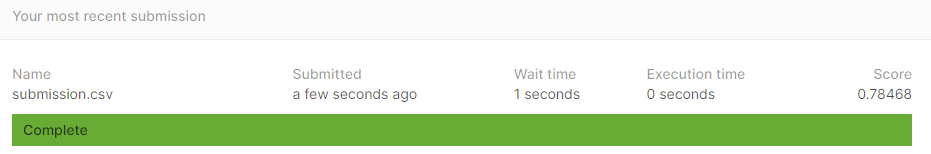

### Deployment

These steps are mostly taken from previous notebook trainings of this course.

In [1395]:
# Load data 
training = pd.concat([train],axis=1)
training.to_csv("training.csv",index=False)

In [1396]:
# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# create an S3 bucket
bucket = sagemaker_session.default_bucket()

In [1397]:
# should be the name of directory you created to save your features data
data_dir = 'training.csv'

# set prefix, a descriptive name for a directory  
prefix = 'passenger_data_s3'

# upload all data to S3
training_file_location = sagemaker_session.upload_data(data_dir, bucket, prefix)
print(training_file_location)

s3://sagemaker-us-east-1-675691040096/passenger_data_s3/training.csv


In [1398]:
# confirm that data is in S3 bucket
empty_check = []
for obj in boto3.resource('s3').Bucket(bucket).objects.all():
    empty_check.append(obj.key)
    print(obj.key)

assert len(empty_check) !=0, 'S3 bucket is empty.'
print('Test passed!')

passenger_data_s3/training.csv
Test passed!


In [1399]:
# directory can be changed to: source_sklearn or source_pytorch
# !pygmentize source_sklearn/train.py
# complete the train.py script

In [1400]:
# Create scikit-learn estimator
from sagemaker.sklearn.estimator import SKLearn

estimator = SKLearn(entry_point='train.py',
                    framework_version='0.20.0',
                    py_version='py3',
                    source_dir='source_sklearn',
                    role=role,
                    train_instance_count=1,
                    train_instance_type='ml.m5.xlarge',
                   )

train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [1402]:
#%%time
estimator.fit({'train': training_file_location})


In [1404]:
#%%time

# uncomment, if needed
# from sagemaker.pytorch import PyTorchModel

# deploy your model to create a predictor
predictor = estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')


In [1405]:
# First: generate predicted, class labels
test_y_preds = predictor.predict(test)


#### Clean Up Resources

In [1407]:
# uncomment and fill in the line below!
# <name_of_deployed_predictor>.delete_endpoint()
predictor.delete_endpoint()

In [1408]:
# deleting bucket, uncomment lines below
bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()

[{'ResponseMetadata': {'RequestId': '4B3DDB10D8860DE6',
   'HostId': '2SgUQtc+6F81Py3Uu8uchdABR72nc6r7ojyVPNRzit7te/N46IA9Ehosl6YWblY0aJppuNkgbow=',
   'HTTPStatusCode': 200,
   'HTTPHeaders': {'x-amz-id-2': '2SgUQtc+6F81Py3Uu8uchdABR72nc6r7ojyVPNRzit7te/N46IA9Ehosl6YWblY0aJppuNkgbow=',
    'x-amz-request-id': '4B3DDB10D8860DE6',
    'date': 'Mon, 18 Jan 2021 22:35:30 GMT',
    'connection': 'close',
    'content-type': 'application/xml',
    'transfer-encoding': 'chunked',
    'server': 'AmazonS3'},
   'RetryAttempts': 0},
  'Deleted': [{'Key': 'sagemaker-scikit-learn-2021-01-18-22-28-34-614/rule-output/ProfilerReport-1611008914/profiler-output/profiler-reports/LowGPUUtilization.json'},
   {'Key': 'sagemaker-scikit-learn-2021-01-18-22-28-34-614/rule-output/ProfilerReport-1611008914/profiler-output/profiler-reports/Dataloader.json'},
   {'Key': 'sagemaker-scikit-learn-2021-01-18-22-28-34-614/rule-output/ProfilerReport-1611008914/profiler-output/profiler-reports/StepOutlier.json'},
   {